In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

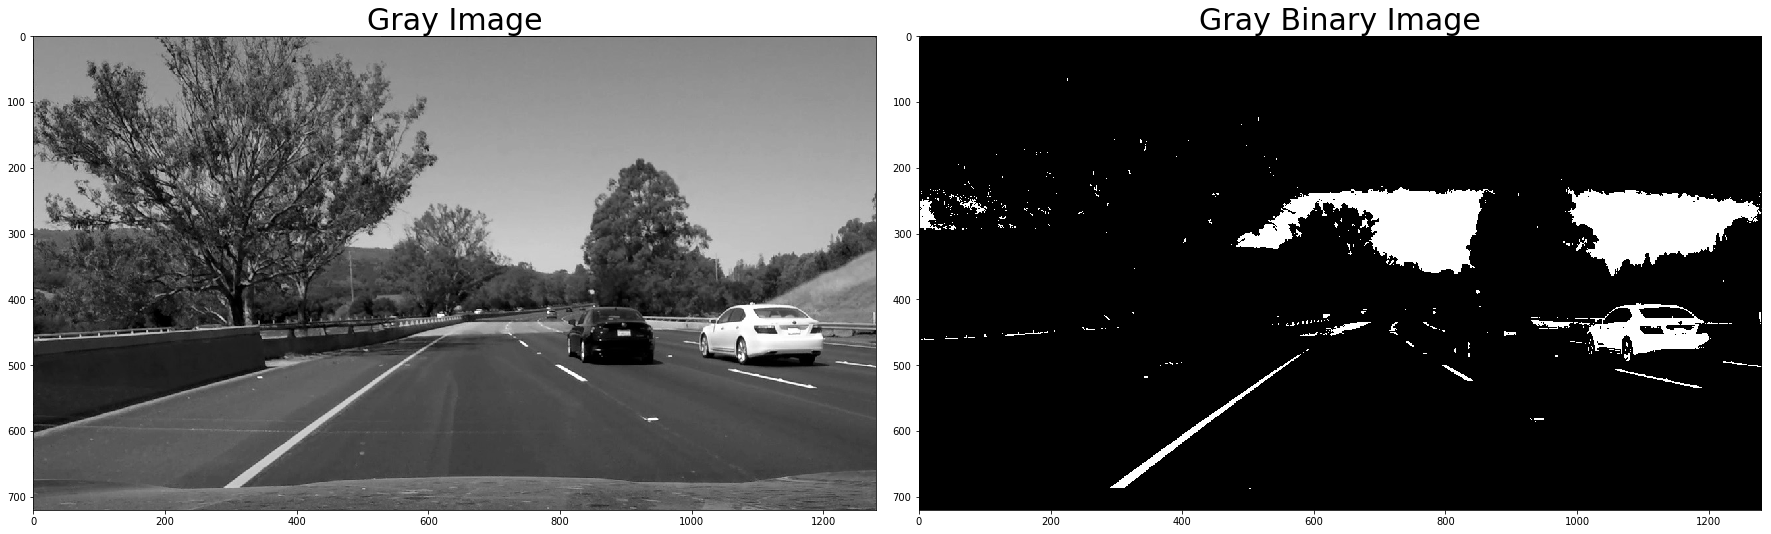

In [4]:
image = mpimg.imread('test_images/test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gray, cmap='gray')
ax1.set_title('Gray Image', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Gray Binary Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

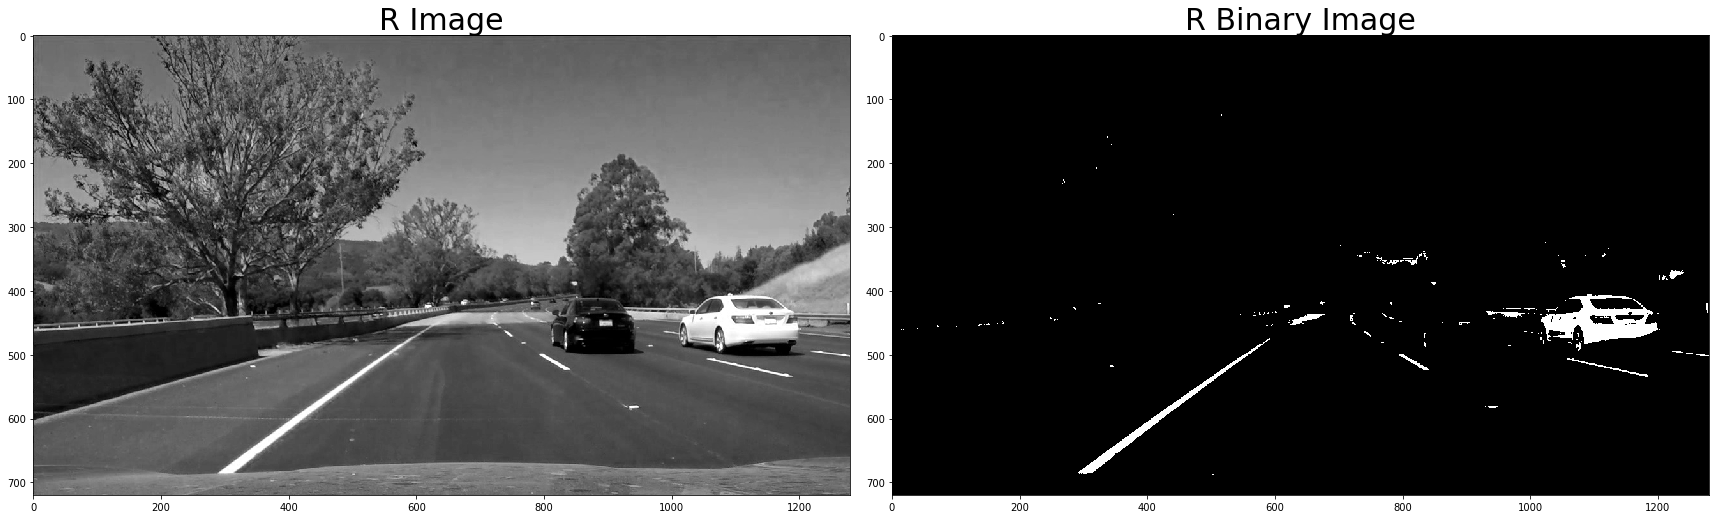

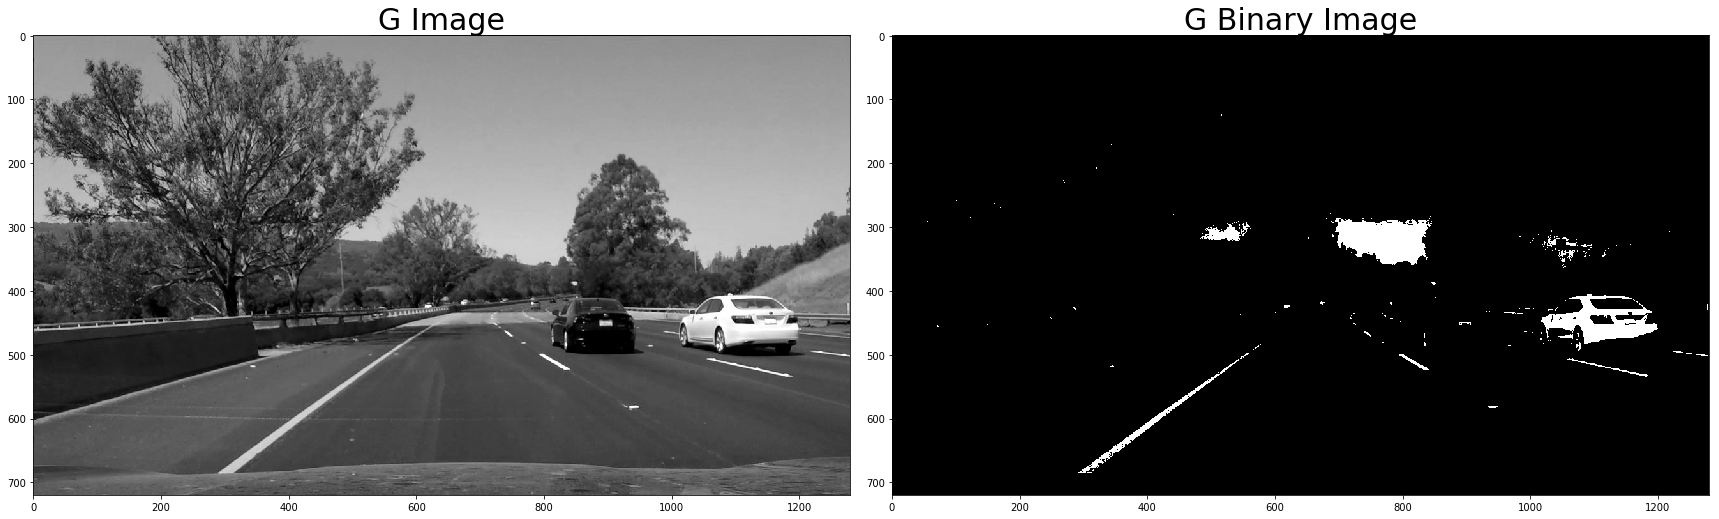

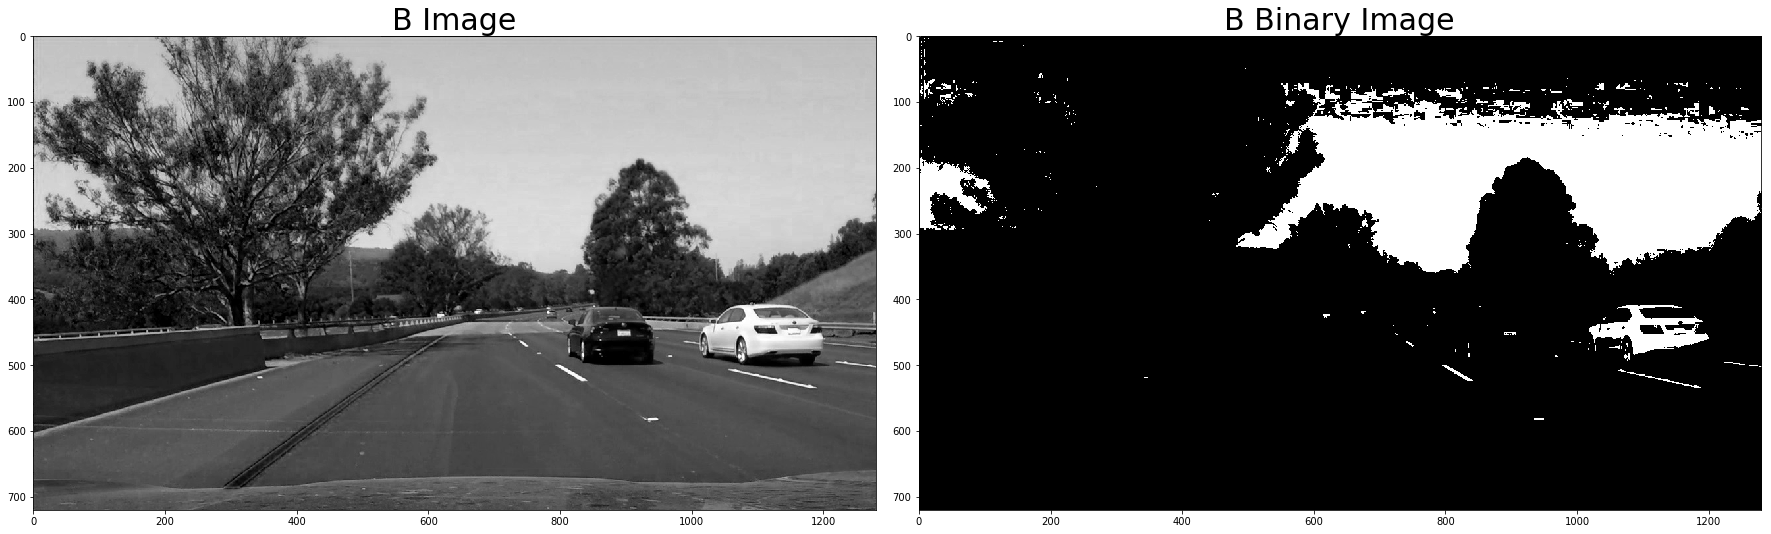

In [5]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

thresh = (200, 255)
r_binary = np.zeros_like(R)
r_binary[(R > thresh[0]) & (R <= thresh[1])] = 1
g_binary = np.zeros_like(G)
g_binary[(G > thresh[0]) & (G <= thresh[1])] = 1
b_binary = np.zeros_like(B)
b_binary[(B > thresh[0]) & (B <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(R, cmap='gray')
ax1.set_title('R Image', fontsize=30)
ax2.imshow(r_binary, cmap='gray')
ax2.set_title('R Binary Image', fontsize=30)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(G, cmap='gray')
ax1.set_title('G Image', fontsize=30)
ax2.imshow(g_binary, cmap='gray')
ax2.set_title('G Binary Image', fontsize=30)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(B, cmap='gray')
ax1.set_title('B Image', fontsize=30)
ax2.imshow(b_binary, cmap='gray')
ax2.set_title('B Binary Image', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

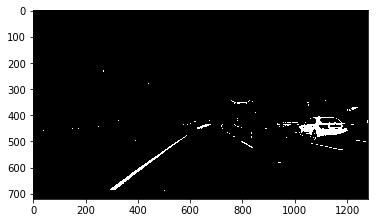

In [6]:
#The R channel does a reasonable job of highlighting the lines, 
#and you can apply a similar higher threshold to find lane-line pixels:

thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
#TODO: Show Title - R Binary
plt.imshow(binary, cmap='gray')
plt.show()

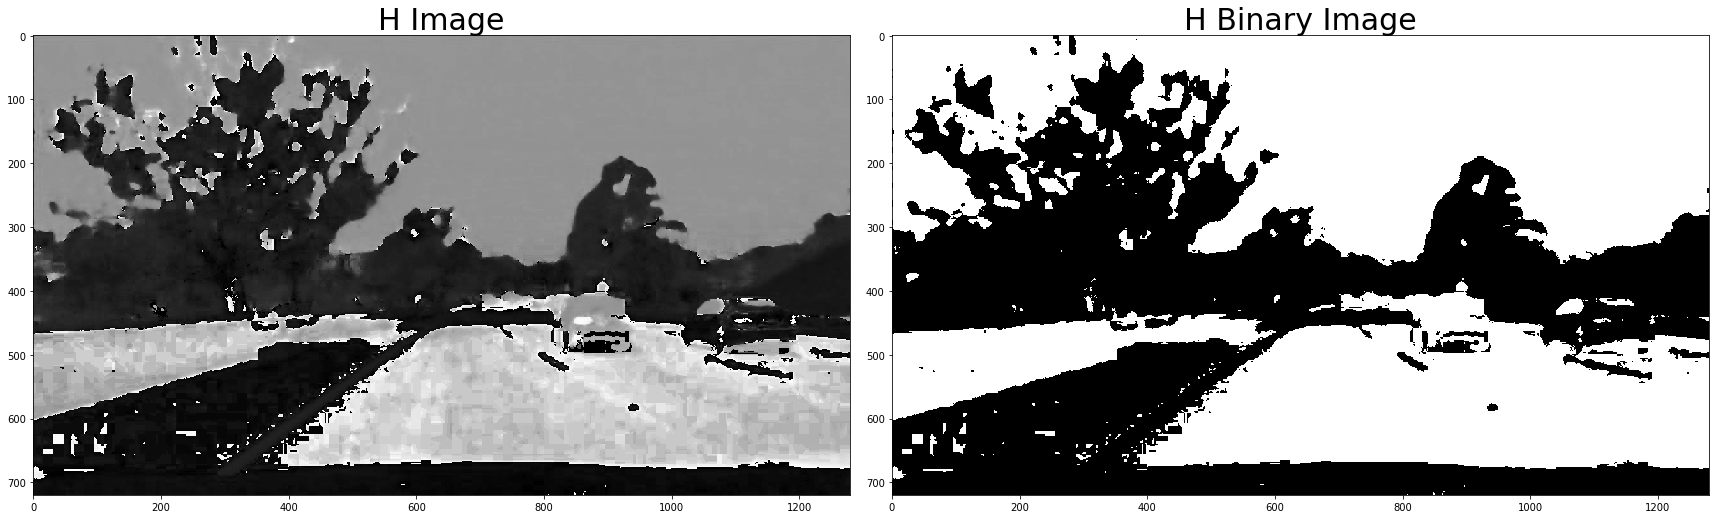

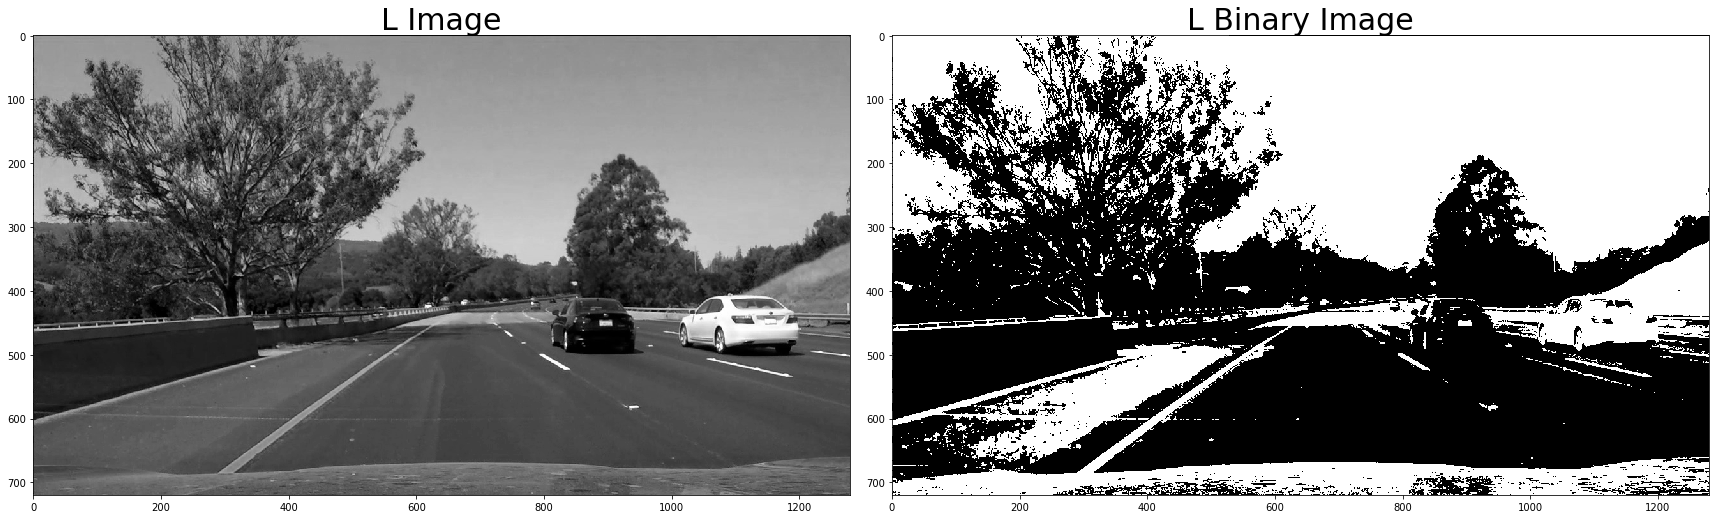

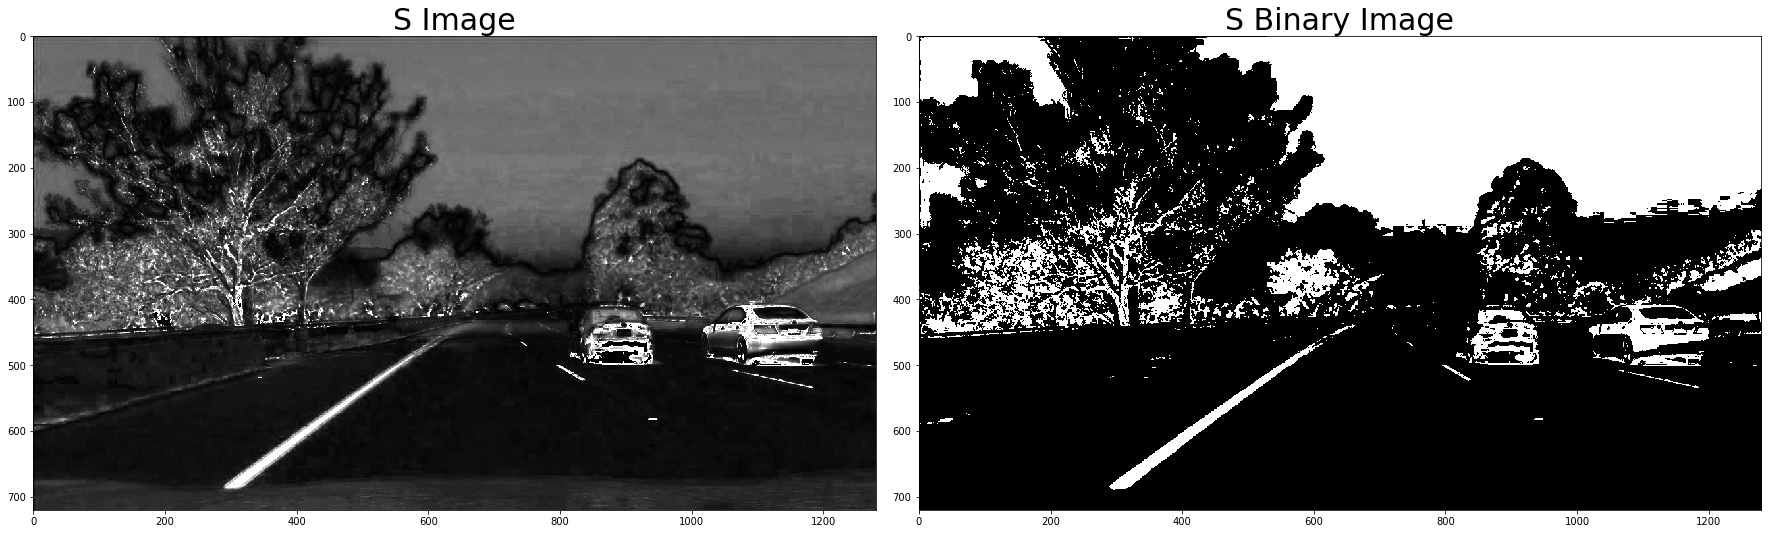

In [7]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

thresh = (90, 255)
h_binary = np.zeros_like(H)
h_binary[(H > thresh[0]) & (H <= thresh[1])] = 1
l_binary = np.zeros_like(L)
l_binary[(L > thresh[0]) & (L <= thresh[1])] = 1
s_binary = np.zeros_like(S)
s_binary[(S > thresh[0]) & (S <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(H, cmap='gray')
ax1.set_title('H Image', fontsize=30)
ax2.imshow(h_binary, cmap='gray')
ax2.set_title('H Binary Image', fontsize=30)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(L, cmap='gray')
ax1.set_title('L Image', fontsize=30)
ax2.imshow(l_binary, cmap='gray')
ax2.set_title('L Binary Image', fontsize=30)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(S, cmap='gray')
ax1.set_title('S Image', fontsize=30)
ax2.imshow(s_binary, cmap='gray')
ax2.set_title('S Binary Image', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

#plt.imshow(H, cmap='gray')
#plt.show()
#plt.imshow(L, cmap='gray')
#plt.show()
#plt.imshow(S, cmap='gray')
#plt.show()



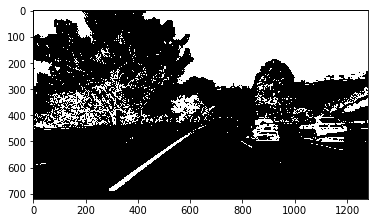

In [9]:
#The S channel picks up the lines well, so let's try applying a threshold there:

thresh = (90, 255)
s_binary = np.zeros_like(S)
s_binary[(S > thresh[0]) & (S <= thresh[1])] = 1

plt.imshow(s_binary, cmap='gray')
plt.show()

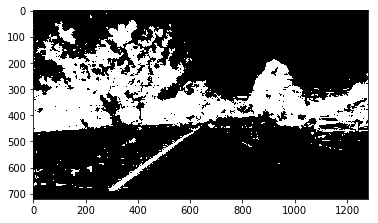

In [10]:
#You can also see that in the H channel, the lane lines appear dark, 
#so we could try a low threshold there and obtain the following result:

thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

plt.imshow(binary, cmap='gray')
plt.show()

In [11]:
def hls_select(img, thresh=(0,255)):
    #Convert to HLS to the image
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    
    #Apply a threshold to the S channel
    S = hls[:,:,2]
    
    binary_output = np.zeros_like(S)
    binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1 # 90 and 255

    #Return a binary image of the threshold result
    #binary_output = np.copy(img) #placeholder line
    return binary_output

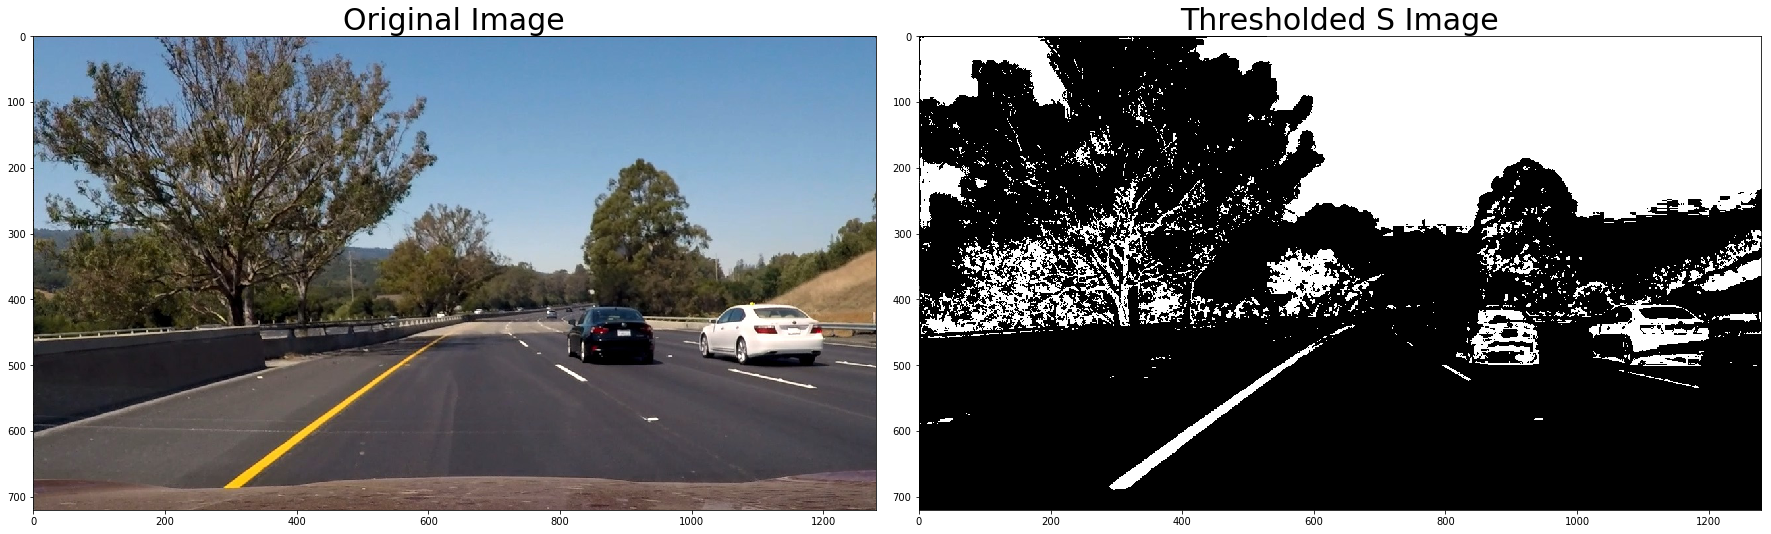

In [12]:
hls_binary = hls_select(image, thresh=(90,255))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S Image', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

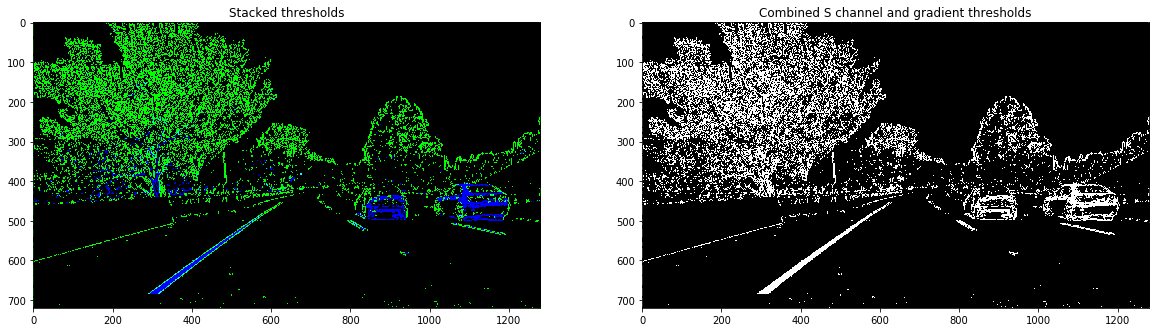

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('test_images/test6.jpg')


# Edit this function to create your own pipeline. 
def findLaneLines(img, s_thresh=(170, 200), sx_thresh=(20, 100)): #s_thresh = 170, 200 and sx_thresh = 20,100
    #img = np.copy(img) 
    # Convert to HSV color space and separate the V channel 
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(np.float) 
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1] 
    s_channel = hls[:,:,2] 
    # Sobel x 
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x 
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal 
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx)) 
    # Threshold x gradient 
    sxbinary = np.zeros_like(scaled_sobel) 
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1 
    # Threshold color channel 
    s_binary = np.zeros_like(s_channel) 
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1 

    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might 
    # be beneficial to replace this channel with something else. 
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    return color_binary, combined_binary 

'''
# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h_channel = hsv[:,:,0]
s_channel = hsv[:,:,1] 
v_channel = hsv[:,:,2]
'''

sx_thresh_min = 20
sx_thresh_max = 100
sx_thresh = (sx_thresh_min, sx_thresh_max)

s_thresh_min = 180
s_thresh_max = 255
s_thresh = (s_thresh_min, s_thresh_max)

color_binary_img, combined_binary_img = findLaneLines(img, s_thresh, sx_thresh)

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary_img)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary_img, cmap='gray')

plt.show()

In [2]:
binary_warped = np.copy(combined_binary_img)

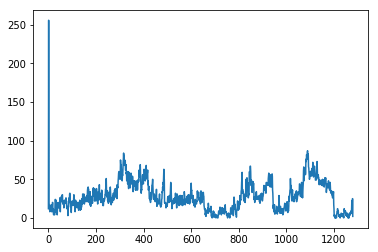

In [3]:
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)
plt.show()

In [16]:
# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

print('midpoint', midpoint)
print('leftx_base', leftx_base)
print('rightx_base', rightx_base)

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
print('window_height', window_height)

# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

print('nonzero', nonzero)
print('nonzeroy', nonzeroy)
print('nonzerox', nonzerox)

# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base

# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

print('left_lane_inds',left_lane_inds)
print('right_lane_inds', right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

print('leftx', leftx)
print('lefty', lefty)
print('rightx', rightx)
print('righty', righty)

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

print('left_fit', left_fit)
print('right_fit', right_fit)

midpoint 640
leftx_base 1
rightx_base 1089
window_height 80
nonzero (array([  0,   0,   0, ..., 719, 719, 719]), array([   0,    1,    2, ..., 1264, 1265, 1278]))
nonzeroy [  0   0   0 ..., 719 719 719]
nonzerox [   0    1    2 ..., 1264 1265 1278]
left_lane_inds [124939 124966 124994 ...,  11415  11416  11417]
right_lane_inds [125539 125540 125541 ...,    172    173    174]
leftx [  1   1   1 ..., 170 172 173]
lefty [640 641 642 ...,  79  79  79]
rightx [1001 1002 1003 ..., 1022 1023 1024]
righty [661 661 661 ...,   0   0   0]
left_fit [ -1.08180611e-04  -1.20935128e-01   1.49002950e+02]
right_fit [ -1.16804752e-03   1.28288575e+00   7.65324355e+02]


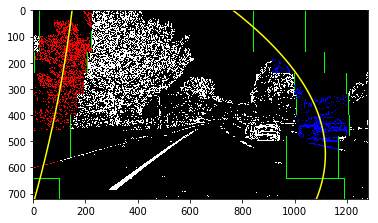

In [14]:
#Visualization

# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()